# WEATHER FORECAST
We implement the Markov chain describing the weather, and we make the trace-plot:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import uniform
from astroML.stats import sigmaG

In [2]:
cloudy = 0
sunny = 1
p_given_cloudy = [0.5, 0.5]
p_given_sunny = [0.1, 0.9]
p_matrix = [p_given_cloudy, p_given_sunny]

day = cloudy
n_days = 10000
forecast = np.zeros(n_days)

for i in tqdm(range(0, n_days)):
    p = uniform(0, 1).rvs(1)
    if p < p_matrix[day][cloudy]:
        day = cloudy
    else:
        day = sunny
    forecast[i] = day

prob_sunny = np.cumsum(forecast)/np.arange(1, n_days + 1)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3115.69it/s]


Text(0, 0.5, 'p(clear)')

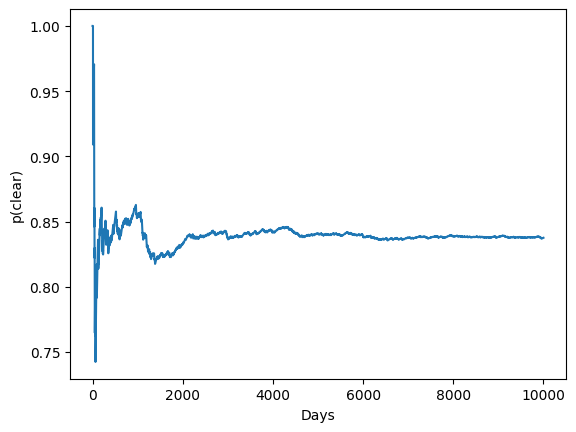

In [3]:
plt.plot(np.arange(1, n_days + 1), prob_sunny)
plt.xlabel("Days")
plt.ylabel("p(clear)")

We plot the histogram of the probability distribution $p(clear)$:

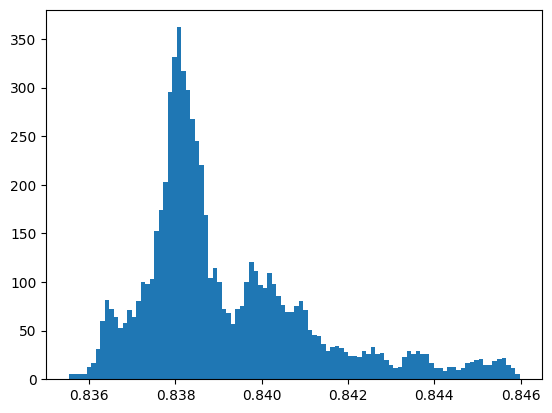

In [4]:
_ = plt.hist(prob_sunny[3000:], bins = 100)

We can compute median and $\sigma_G$:

In [5]:
print("Median: {:.4f}; sigmaG: {:.4f}".format(np.median(prob_sunny[2000:]), sigmaG(prob_sunny[2000:])))

Median: 0.8386; sigmaG: 0.0018


## Stock market
We do the same for the stock market

In [6]:
bull = 0
bear = 1
stagnant = 2
p_given_bull = [0.9, 0.075, 0.025]
p_given_bear = [0.15, 0.80, 0.05]
p_give_stagnant = [0.25, 0.25, 0.50]
p_matrix = [p_given_bull, p_given_bear, p_give_stagnant]

day = bull
n_days = 10000
forecast_stock = np.zeros(n_days)

for i in tqdm(range(0, n_days)):
    p = uniform(0, 1).rvs(1)
    if p < p_matrix[day][bull]:
        day = bull
    else:
        if p >= p_matrix[day][bull] and p < p_matrix[day][bull] + p_matrix[day][bear]:
            day = bear
        else:
            day = stagnant
    forecast_stock[i] = day

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2643.42it/s]


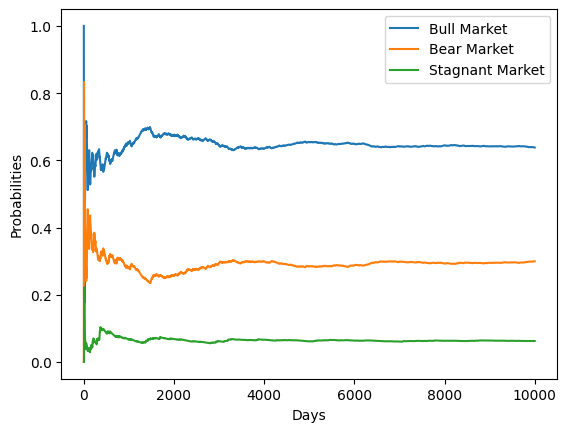

In [7]:
prob_bull = np.zeros(n_days)
prob_bear = np.zeros(n_days)
prob_stagnant = np.zeros(n_days)

cum_bull = 0
cum_bear = 0
cum_stagnant = 0
for i in range(n_days):
    if forecast_stock[i] == bull:
        cum_bull += 1
        prob_bull[i] = cum_bull/(i+1)
        prob_bear[i] = cum_bear/(i+1)
        prob_stagnant[i] = cum_stagnant/(i+1)
    if forecast_stock[i] == bear:
        cum_bear += 1
        prob_bull[i] = cum_bull/(i+1)
        prob_bear[i] = cum_bear/(i+1)
        prob_stagnant[i] = cum_stagnant/(i+1)
    if forecast_stock[i] == stagnant:
        cum_stagnant += 1
        prob_bull[i] = cum_bull/(i+1)
        prob_bear[i] = cum_bear/(i+1)
        prob_stagnant[i] = cum_stagnant/(i+1)

plt.plot(np.arange(1, n_days + 1), prob_bull, label = "Bull Market")
plt.plot(np.arange(1, n_days + 1), prob_bear, label = "Bear Market")
plt.plot(np.arange(1, n_days + 1), prob_stagnant, label = "Stagnant Market")
plt.xlabel("Days")
plt.ylabel("Probabilities")
plt.legend()

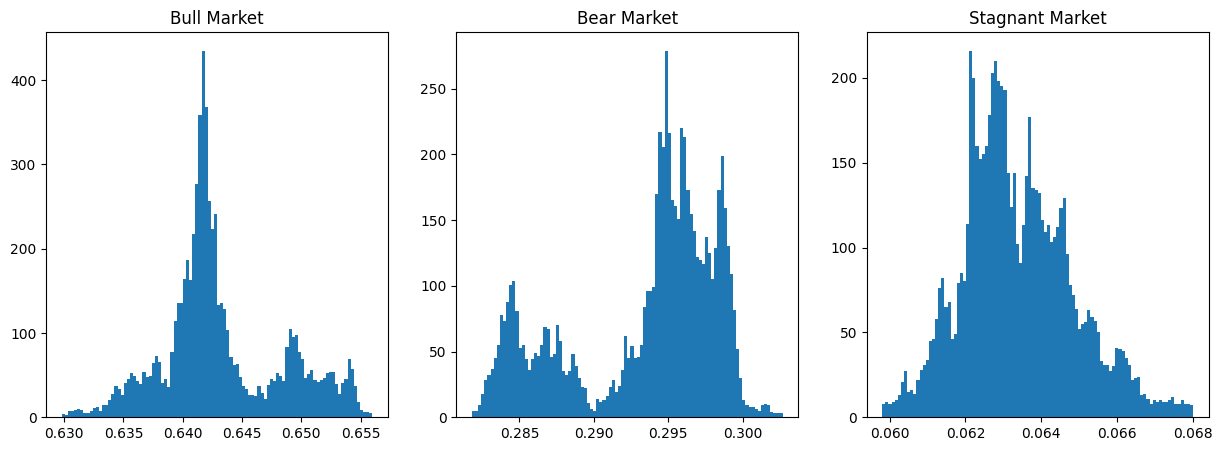

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
_ = plt.hist(prob_bull[3000:], bins = 100)
_ = plt.title("Bull Market")
plt.subplot(1, 3, 2)
_ = plt.hist(prob_bear[3000:], bins = 100)
_ = plt.title("Bear Market")
plt.subplot(1, 3, 3)
_ = plt.hist(prob_stagnant[3000:], bins = 100)
_ = plt.title("Stagnant Market")

In [9]:
print("Bull market, median: {:.4f}; sigmaG: {:.4f}".format(np.median(prob_bull[3000:]), sigmaG(prob_bull[3000:])))
print("Bear market, median: {:.4f}; sigmaG: {:.4f}".format(np.median(prob_bear[3000:]), sigmaG(prob_bear[3000:])))
print("Stagnant market, median: {:.4f}; sigmaG: {:.4f}".format(np.median(prob_stagnant[3000:]), sigmaG(prob_stagnant[3000:])))

Bull market, median: 0.6420; sigmaG: 0.0043
Bear market, median: 0.2949; sigmaG: 0.0057
Stagnant market, median: 0.0632; sigmaG: 0.0014
